**Filtreleme, orjinal bir görüntüyü mevcut durumundan gürültülerini gidererek daha iyi bir duruma getirmek için kullanılan teknik**

**Gaussian filtrelemesi kullanılmayı tercih edilmiştir çünkü bu filtre gürültüyü azaltır iken yaprağın genel formunu koruyabilir ve aynı zamanda keskin kenarları da yumuşatmazlar.**

**Görüntüdeki gürültüleri ve ayrıntıları kaldırmak için kullanılan iki boyutlu bir bulanıklaştırma operatörü olan Gauus filtresinin avantajı, filtreleme işlemini yatay ve dikey eksenlerde gerçekleştirilmesidir.**

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from pylab import *
from PIL import Image

In [ ]:
goruntu = array(Image.open('/content/Ak (50).png').convert("L"))

In [ ]:
bosluk = ones ((len(goruntu),20))*255

In [ ]:
def Gaussian_Blur(goruntu,kernel_boyutu=(3,3), sigma=2):
  gaussian_kernel = np.zeros(kernel_boyutu,np.float32)
  
  if kernel_boyutu [0] % 2 == 0 or kernel_boyutu [1] % 2 == 0:
    raise ValueError("kernel_boyutu tek sayılardan oluşmalı")
  
  k_x = kernel_boyutu[0]
  k_y = kernel_boyutu[1]

  for x in range(-k_x,k_x+1):
    for y in range(-k_y, k_y+1):
      x1 = 2*np.pi*(sigma**2)
      x2 = np.exp(-(x**2 + y**2)/(2*sigma**2))
      gaussian_kernel[x+k_x, y+k_y] = (1/x1)*x2

  gaussian_veri = zeros((len(goruntu),len(goruntu[0])))
  kernel_dizisi = []

  for i in range(len(goruntu)):
    for j in range (len(goruntu[0])):
      if (i-k_x < 0 or i + k_x > len(goruntu)-1) or (
          j-k_y < 0 or j + k_y > len(goruntu[0])-1):
          gaussian_veri [i] [j] = 0
      else:
        for k in range(kernel_boyutu[0]):
          for m in range(kernel_boyutu[1]):
            kernel_dizisi.append(goruntu[i-k_x+k][
                j - k_y+m] * gaussian_kernel[k,m])
            
      piksel = sum(array(kernel_dizisi))
      if len(kernel_dizisi) ==len(gaussian_kernel)*len(
          gaussian_kernel[0]):
        gaussian_veri [i] [j] = piksel
        kernel_dizisi = []

  return gaussian_veri   

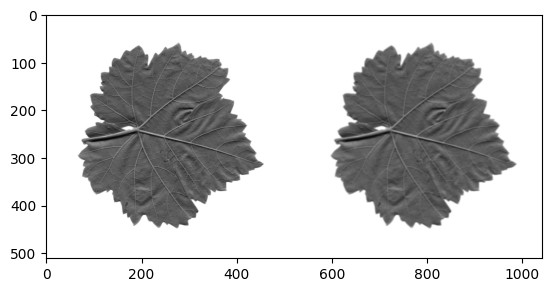

In [ ]:
yeni_goruntu = cv2.GaussianBlur(goruntu,(5,3),1)
x = np.concatenate((goruntu,bosluk,yeni_goruntu),axis=1)
img = Image.fromarray(x.astype('uint8'))
imshow(img,cmap="gray")

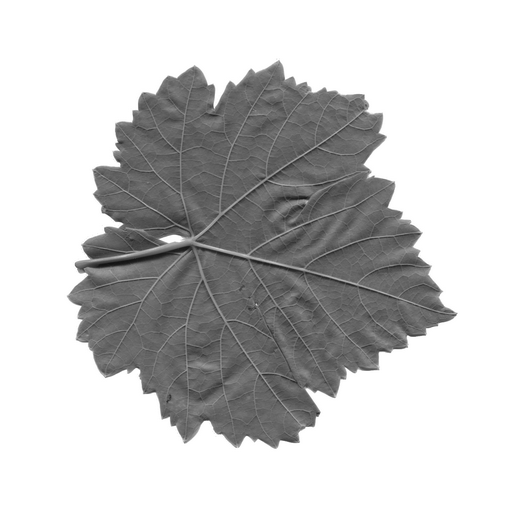

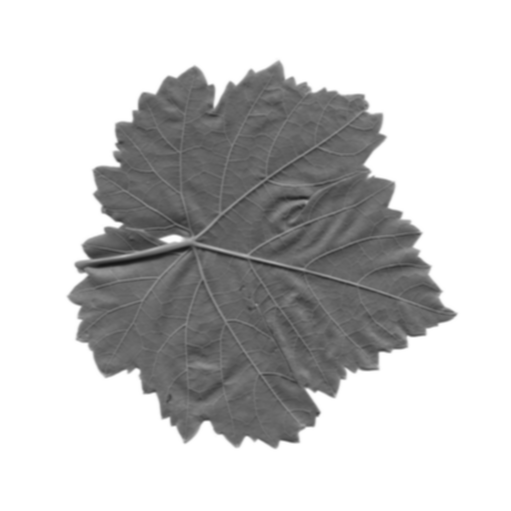

In [ ]:
cv2_imshow(goruntu)
cv2_imshow(yeni_goruntu)
cv2.waitKey(0)
cv2.destroyAllWindows()